In [1]:
# Import necessary libraries
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# 1. Download the dataset from the same source
url = "https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.csv"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

In [2]:
data.shape

(196246, 16)

In [3]:
# 2. Data Preprocessing
# Fill missing values with forward fill (for time series continuity) and drop rows where critical columns are still missing
df = data[['date', 'location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].ffill().dropna()

# Convert date to datetime and extract the day of the year as a numerical feature
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear

# Features and target
features = df[['day_of_year', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]
target = df['daily_vaccinations']

In [4]:
df.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,day_of_year
78,2021-05-11,Afghanistan,504502.0,448878.0,55624.0,13921.0,131
79,2021-05-12,Afghanistan,504502.0,448878.0,55624.0,12621.0,132
80,2021-05-13,Afghanistan,504502.0,448878.0,55624.0,11321.0,133
81,2021-05-14,Afghanistan,504502.0,448878.0,55624.0,10022.0,134
82,2021-05-15,Afghanistan,504502.0,448878.0,55624.0,8722.0,135


In [5]:
# prompt: create a data frame that just contain locations which are countries (not a continent or area)

df_countries = df[~df['location'].isin(['World', 'Asia', 'Europe', 'European Union', 'North America', 'South America', 'Africa', 'Oceania'])]

In [6]:
# prompt: create dataset that just contains data for continents

df_continents = df[df['location'].isin(['World', 'Asia', 'Europe', 'European Union', 'North America', 'South America', 'Africa', 'Oceania'])]

In [7]:
df_continents

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,day_of_year
1043,2021-01-09,Africa,0.000000e+00,0.000000e+00,1.837039e+07,0.0,9
1044,2021-01-10,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,10
1045,2021-01-11,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,11
1046,2021-01-12,Africa,0.000000e+00,0.000000e+00,1.837039e+07,500.0,12
1047,2021-01-13,Africa,2.000000e+03,2.000000e+03,1.837039e+07,500.0,13
...,...,...,...,...,...,...,...
193893,2024-08-10,World,1.357876e+10,5.631264e+09,5.177943e+09,1340.0,223
193894,2024-08-11,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,224
193895,2024-08-12,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,225
193896,2024-08-13,World,1.357877e+10,5.631264e+09,5.177943e+09,1340.0,226


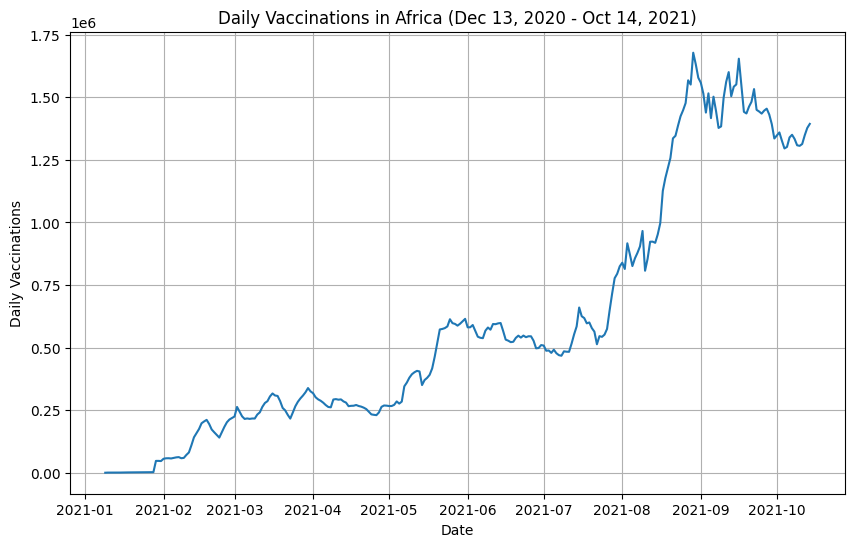

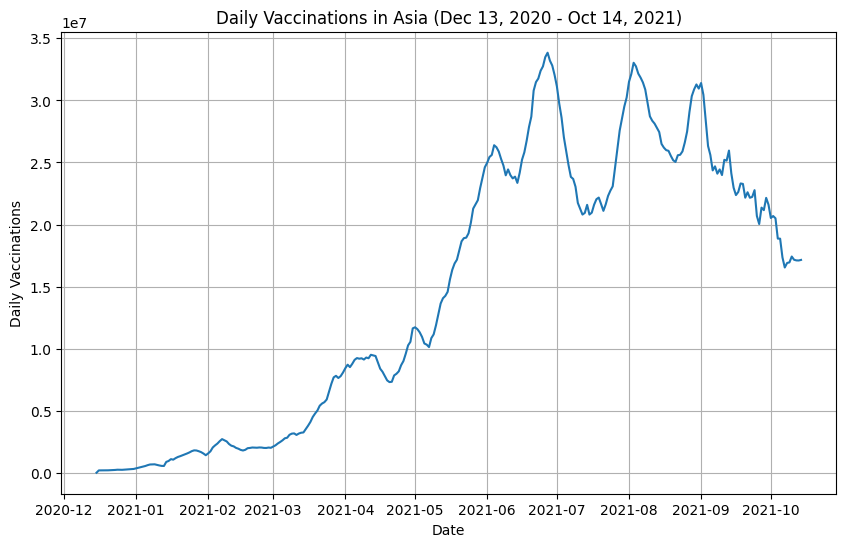

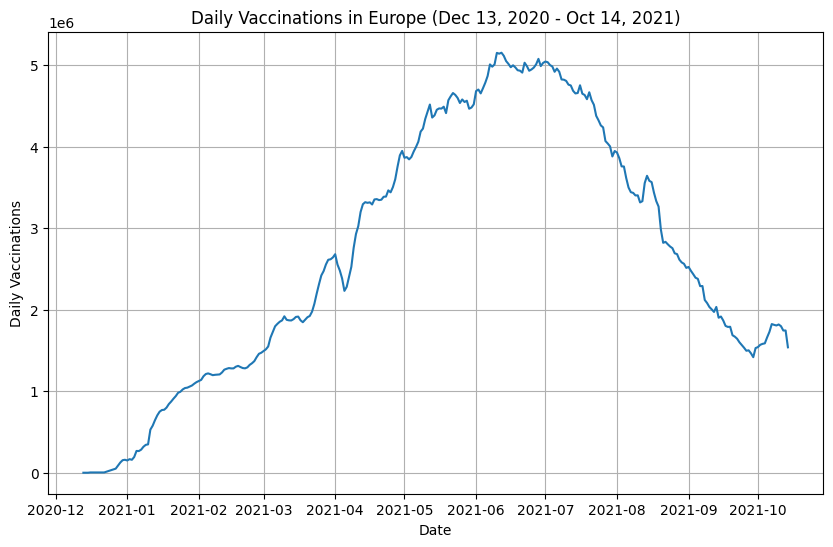

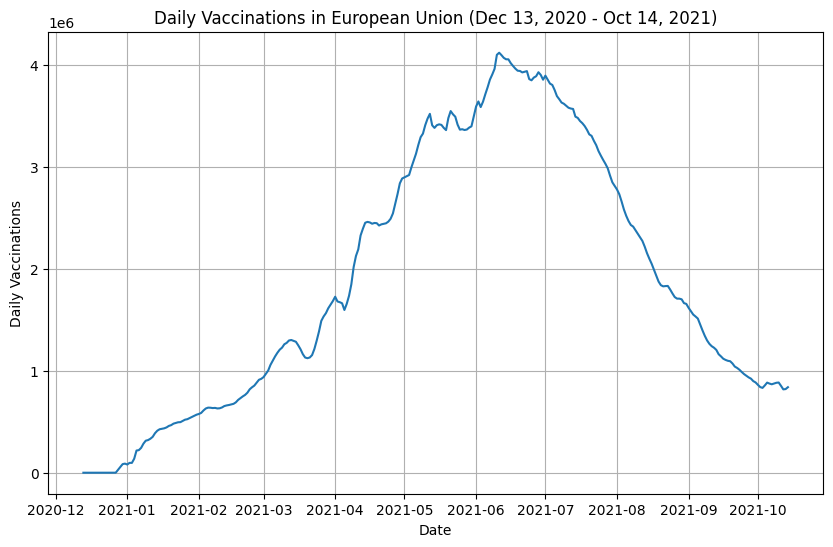

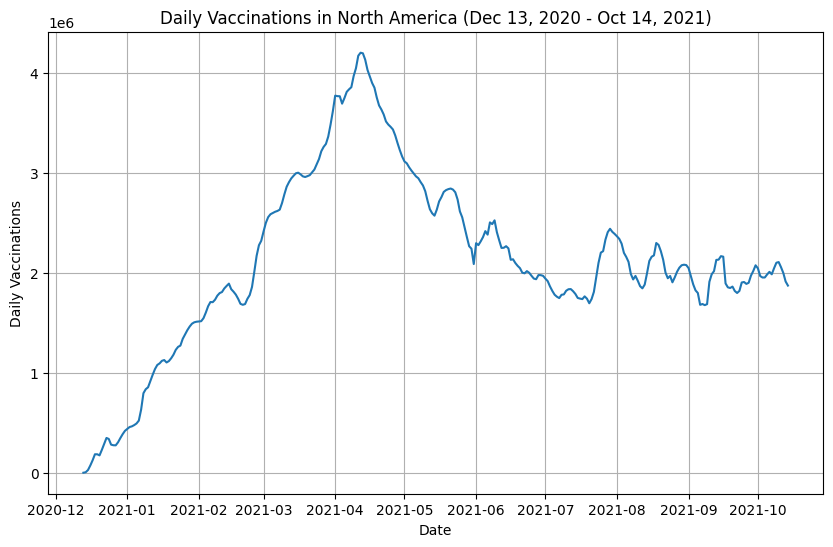

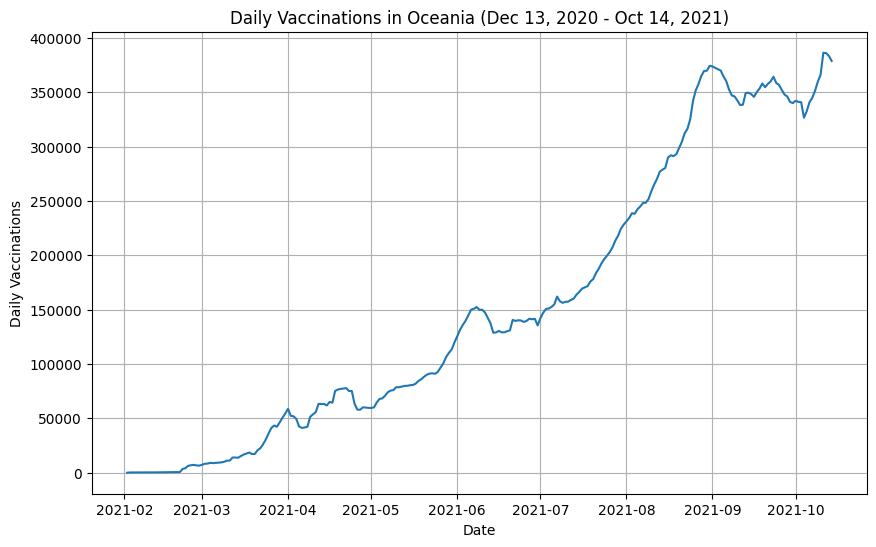

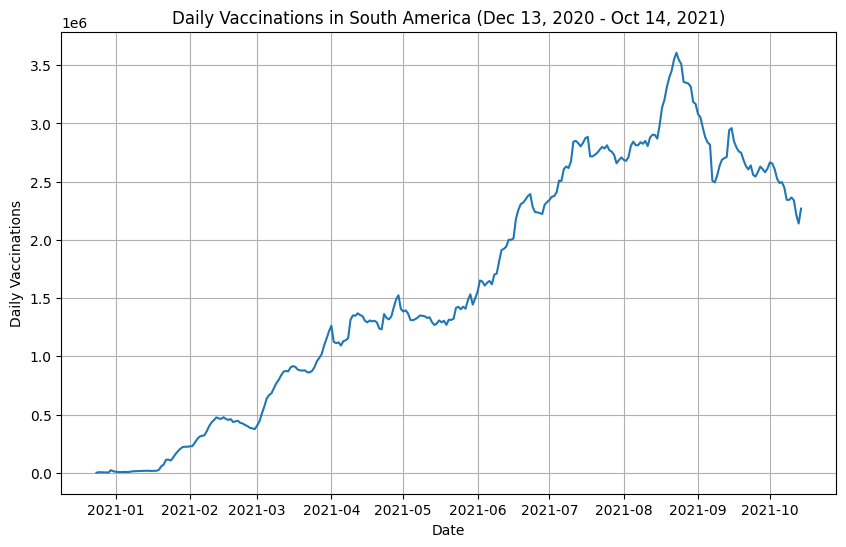

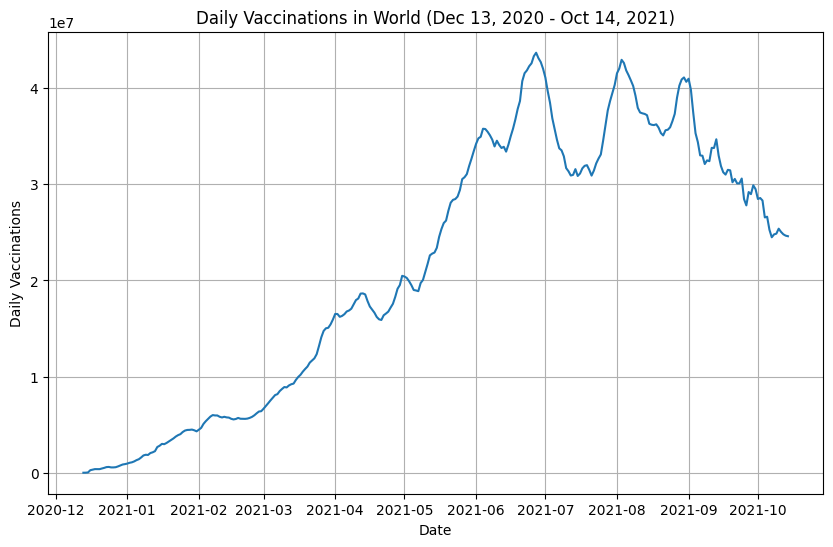

In [8]:
# prompt: create graphs again from the 13th of December 2020 to the 14th of October 2021.

import matplotlib.pyplot as plt
for continent in df_continents['location'].unique():
  df_continent = df_continents[df_continents['location'] == continent]
  df_continent = df_continent[(df_continent['date'] >= '2020-12-13') & (df_continent['date'] <= '2021-10-14')]
  plt.figure(figsize=(10, 6))
  plt.plot(df_continent['date'], df_continent['daily_vaccinations'])
  plt.title(f'Daily Vaccinations in {continent} (Dec 13, 2020 - Oct 14, 2021)')
  plt.xlabel('Date')
  plt.ylabel('Daily Vaccinations')
  plt.grid(True)
  plt.show()

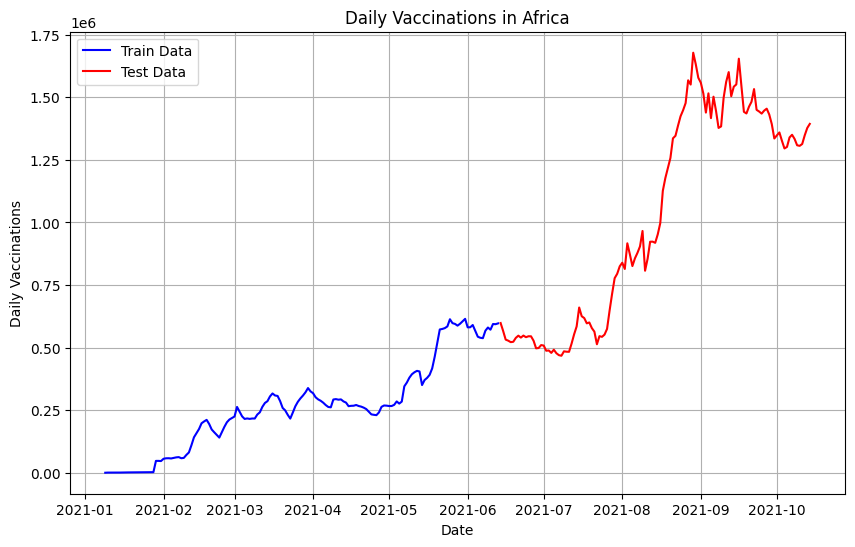

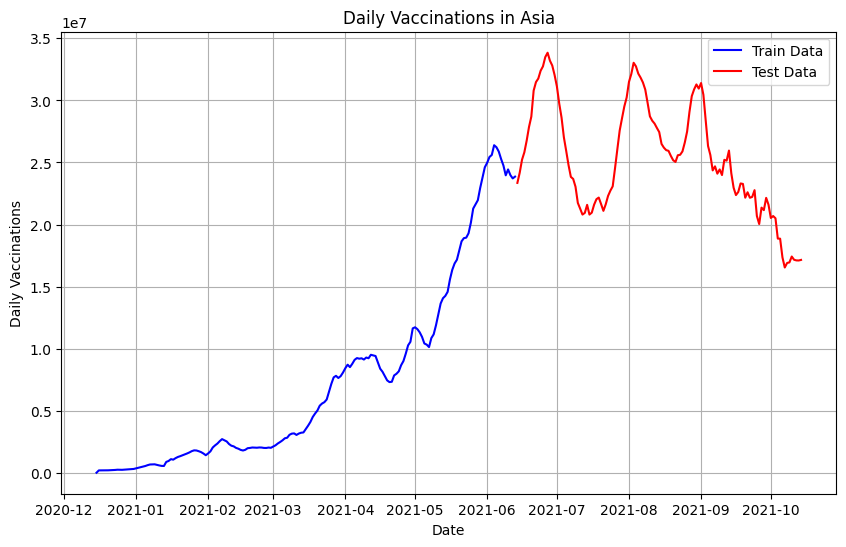

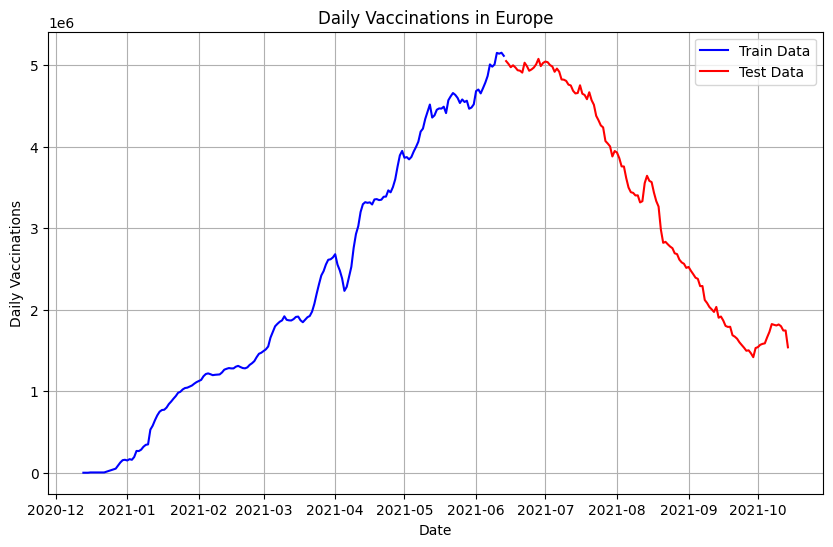

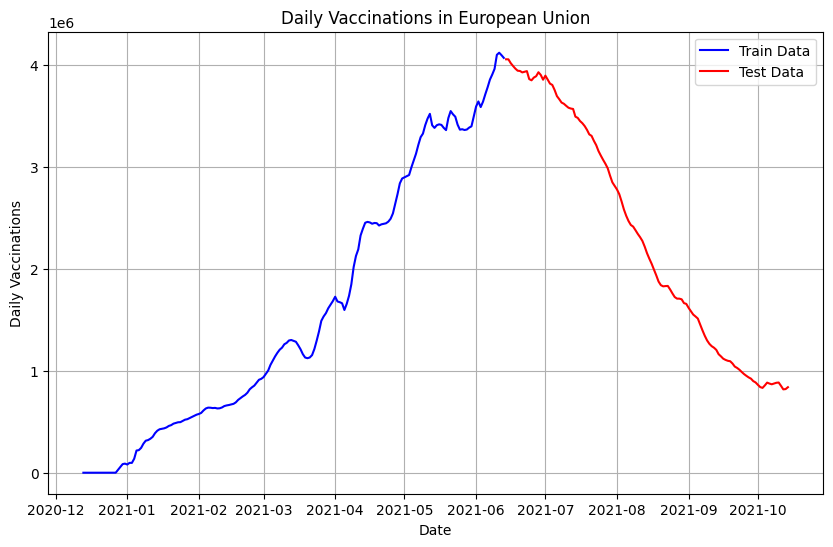

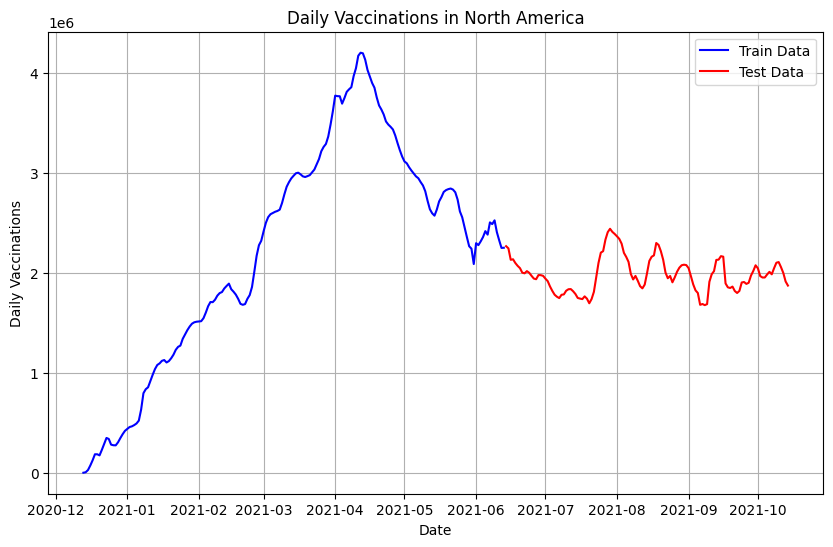

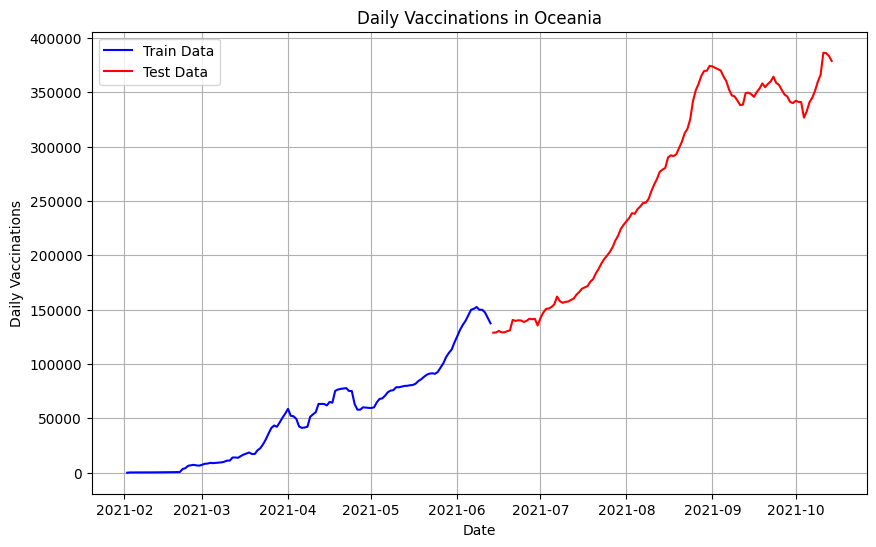

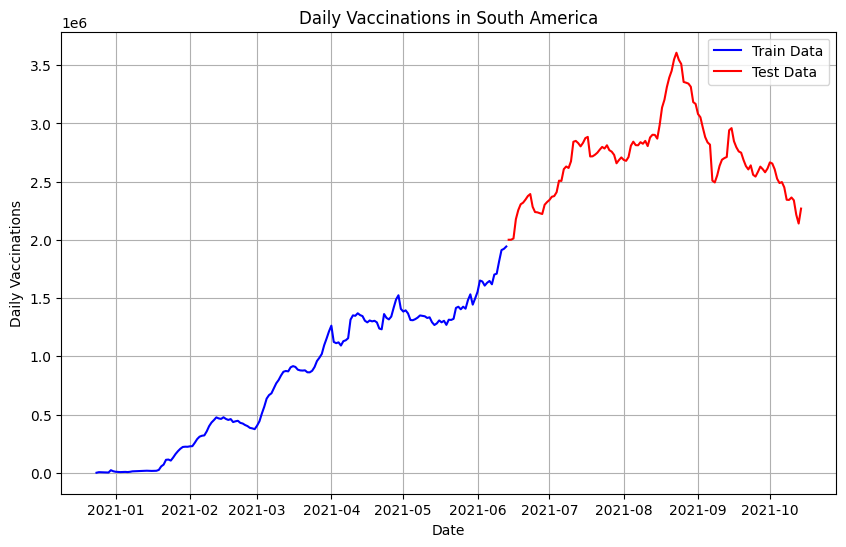

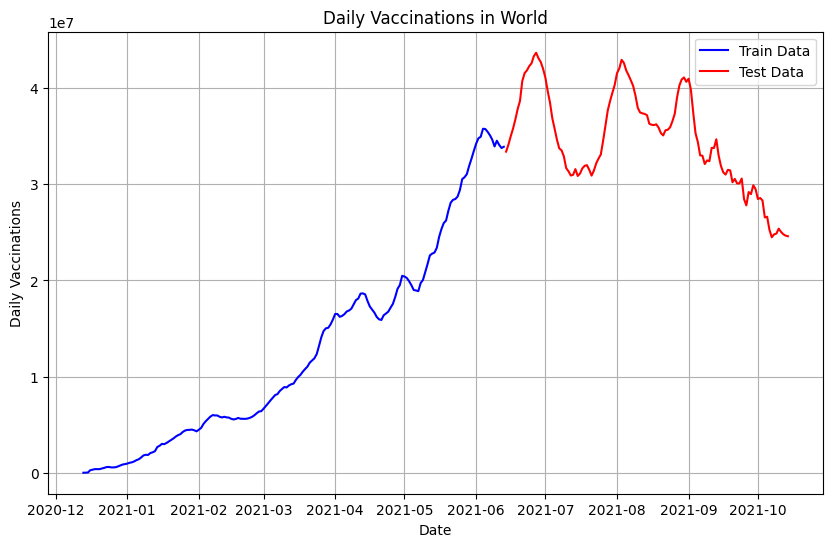

In [9]:
# prompt: create graphs again and use different blue for daily data from the 13th of December 2020 to the 13th of June 2021,  and red from the 14th of June 2021 to the 14th of October 2021, label the blue part of graph as train data, and red part of graph as test data

import matplotlib.pyplot as plt

for continent in df_continents['location'].unique():
    df_continent = df_continents[df_continents['location'] == continent]
    plt.figure(figsize=(10, 6))

    # Filter data for the specified date ranges
    train_data = df_continent[(df_continent['date'] >= '2020-12-13') & (df_continent['date'] <= '2021-06-13')]
    test_data = df_continent[(df_continent['date'] >= '2021-06-14') & (df_continent['date'] <= '2021-10-14')]

    # Plot the train data in blue
    plt.plot(train_data['date'], train_data['daily_vaccinations'], color='blue', label='Train Data')

    # Plot the test data in red
    plt.plot(test_data['date'], test_data['daily_vaccinations'], color='red', label='Test Data')


    plt.title(f'Daily Vaccinations in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations')
    plt.grid(True)
    plt.legend()  # Show the legend for train and test data
    plt.show()